**Vamos experimentar agora o algoritmo Naive Bayes?**

In [31]:
!pip -q install yellowbrick

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

In [33]:
import pickle
with open('./content/sample_data/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [34]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
 
# Carregando o dataset iris
iris = load_iris()
X, y = iris.data, iris.target
 
def objective(trial):
    # Definição do espaço de hiperparâmetros
    var_smoothing = trial.suggest_float('var_smoothing', 1e-10, 1e-7, log=True)
 
    # Criação do modelo
    model = GaussianNB(var_smoothing=var_smoothing)

    # Treinamento do modelo
    model.fit(X_treino, y_treino)
     
    # Predição nos dados de teste
    y_pred = model.predict(X_teste)
     
    # Retorna a acurácia como objetivo
    return accuracy_score(y_teste, y_pred)
 
# Criação do estudo Optuna
study = optuna.create_study(direction='maximize') # Maximizar a acurácia
 
# Otimização
study.optimize(objective, n_trials=100) # número de tentativas
 
# Impressão dos melhores hiperparâmetros
print("Melhores hiperparâmetros:", study.best_params)
print("Melhor acurácia:", study.best_value)
 
# Treinamento do modelo com os melhores hiperparâmetros encontrados
modelo = GaussianNB(**study.best_params)
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
accuracy = accuracy_score(y_teste, y_pred)
print(f"Acurácia do melhor modelo nos dados de teste: {accuracy}")

[I 2025-09-28 17:17:11,657] A new study created in memory with name: no-name-9a09ebcb-4ddf-4de6-938a-fc6c54c76cf8
[I 2025-09-28 17:17:11,665] Trial 0 finished with value: 0.776536312849162 and parameters: {'var_smoothing': 1.4018951494818406e-10}. Best is trial 0 with value: 0.776536312849162.
[I 2025-09-28 17:17:11,670] Trial 1 finished with value: 0.776536312849162 and parameters: {'var_smoothing': 1.3478453855222102e-10}. Best is trial 0 with value: 0.776536312849162.
[I 2025-09-28 17:17:11,675] Trial 2 finished with value: 0.776536312849162 and parameters: {'var_smoothing': 5.712555694034683e-10}. Best is trial 0 with value: 0.776536312849162.
[I 2025-09-28 17:17:11,681] Trial 3 finished with value: 0.776536312849162 and parameters: {'var_smoothing': 6.429700029747009e-08}. Best is trial 0 with value: 0.776536312849162.
[I 2025-09-28 17:17:11,685] Trial 4 finished with value: 0.776536312849162 and parameters: {'var_smoothing': 9.145986963136928e-08}. Best is trial 0 with value: 0.7

Melhores hiperparâmetros: {'var_smoothing': 1.4018951494818406e-10}
Melhor acurácia: 0.776536312849162
Acurácia do melhor modelo nos dados de teste: 0.776536312849162


In [35]:
""" modelo = GaussianNB() """

' modelo = GaussianNB() '

In [36]:
""" modelo.fit(X_treino, y_treino) """

' modelo.fit(X_treino, y_treino) '



> **Vamos testar o modelo?**



In [37]:
previsoes = modelo.predict(X_teste)

In [38]:
previsoes

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [39]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.776536312849162

In [41]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[85, 20],
       [20, 54]])

/home/gabriel/Documentos/Projetos_git/Exercicios-IA-PUC/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.776536312849162

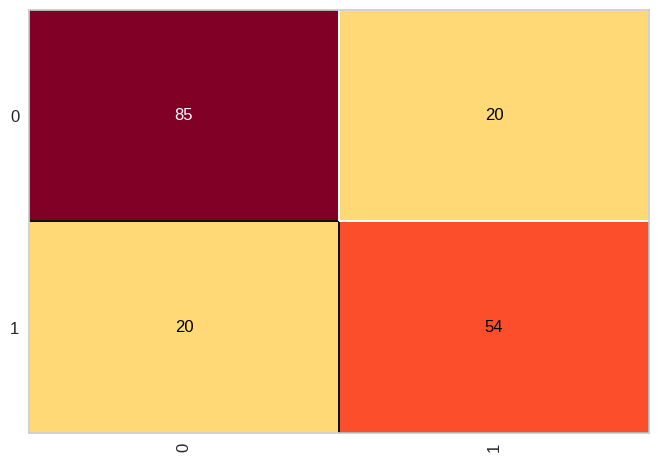

In [42]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [43]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

